In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# read in the site coordinates 

path = "/Users/hrd/Documents/data/全国空气质量/_站点列表/站点列表-2017.12.01起.csv"
site = pd.read_csv(path)

In [104]:
# read the site name (a), lon (b) and lat (c)
a = site.iloc[:,2]
b = site.iloc[:,3]
c = site.iloc[:,4]

lon=[]
lat = []

for i in range(len(a)):
    if a[i] == '广州' or a[i] == '深圳' or a[i] == '珠海' or a[i] == '佛山' or a[i] == '中山' or a[i] == '江门' or a[i] == '东莞'or a[i] == '惠州' or a[i] == '肇庆':
        lon.append(b[i])
        lat.append(c[i])


# omit the nan value
lon.pop(2)
lat.pop(2)

nan

In [105]:
file_path = "/Users/hrd/Documents/data/城市_20170101-20171231/filename.log"

with open(file_path, "r") as file:
        content = file.read()
        #print(content)

In [12]:
content[:25]
content[26:51]
content[52:77]
len(content)
(9490-25)/26

364.03846153846155

In [81]:
# read in the data for 2017
data = []

for i in range(365):
    path = "/Users/hrd/Documents/data/城市_20170101-20171231/" + content[26*i : 26*i+25]
    data.append(pd.read_csv(path))

In [72]:
# check the data read

#data[-1]

In [46]:
# column 56: Guangzhou
# column 64: Zhaoqing
# the 9 cities in PRD

data[1].iloc[1,2]

'PM2.5'

sort the data to include PM2.5 data (rows) only

In [98]:
data[1].iloc[1,:]

date     20170102
hour            3
type        PM2.5
北京          350.0
天津          202.0
           ...   
塔城地区         30.0
阿勒泰地区         3.0
石河子         152.0
五家渠         236.0
三沙            NaN
Name: 1, Length: 370, dtype: object

In [103]:
sort = []
#sort = pd.DataFrame()

for i in range(len(data)):
    for j in range(data[i].shape[0]):
        if data[i].iloc[j,2] == 'PM2.5':
            sort.append(data[i].iloc[j,:])
            #sort.loc[len(sort)] = data[i].iloc[j,:]

In [102]:
# sort = pd.DataFrame()

# for i in range(len(data)):
#     d = data[i]
#     rows = data[d.iloc[:,2]=='PM2.5']
#     sort.append(rows)


In [73]:
data[1]['type']

0            AQI
1          PM2.5
2      PM2.5_24h
3           PM10
4       PM10_24h
         ...    
295       O3_24h
296        O3_8h
297    O3_8h_24h
298           CO
299       CO_24h
Name: type, Length: 300, dtype: object

In [108]:
type(sort[1])

pandas.core.series.Series

In [118]:
# in 'sort',
# the indexes of the cites are 56-64
sort[1].iloc[56]

97.0

In [107]:
print(sort[1].shape[0])
print(data[1].shape[1])

370
370


In [39]:
# delect the cites in PRD region only
# 56-65

prd = []

for i in range(len(data)):
    prd.append(data[i].iloc[:,56:65])
    

In [109]:
#data[1].iloc[:,56:65]

In [126]:
#prd

In [124]:
gz17 = []
sz17 = []
zh17 = []
fs17 = []
zs17 = []
jm17 = []
dg17 = []
hz17 = []
zq17 = []

for i in range(len(sort)):
    gz17.append(sort[i].iloc[56])
    sz17.append(sort[i].iloc[57])
    zh17.append(sort[i].iloc[58])
    fs17.append(sort[i].iloc[59])
    zs17.append(sort[i].iloc[60])
    jm17.append(sort[i].iloc[61])
    dg17.append(sort[i].iloc[62])
    hz17.append(sort[i].iloc[63])
    zq17.append(sort[i].iloc[64])

In [130]:
# date and hour of the data

date = []
hour = []

for i in range(len(sort)):
    date.append(sort[i].iloc[0])
    hour.append(sort[i].iloc[1])


In [94]:
# gz18 = []
# sz18 = []
# zh18 = []
# fs18 = []
# zs18 = []
# jm18 = []
# dg18 = []
# hz18 = []
# zq18 = []
# for i in range(len(data18)):
#     rows = data18[i].shape[0]
#     for j in range(rows):
#         if data18[i].iloc[j,2] == 'NO2':
#             gz18.append(data18[i].iloc[j,56])
#             sz18.append(data18[i].iloc[j,57])
#             zh18.append(data18[i].iloc[j,58])
#             fs18.append(data18[i].iloc[j,59])
#             zs18.append(data18[i].iloc[j,60])
#             jm18.append(data18[i].iloc[j,61])
#             dg18.append(data18[i].iloc[j,62])
#             hz18.append(data18[i].iloc[j,63])
#             zq18.append(data18[i].iloc[j,64])
#             gz18.append(data18[i].iloc[j,54])

In [131]:
#sort.iloc[:,56]

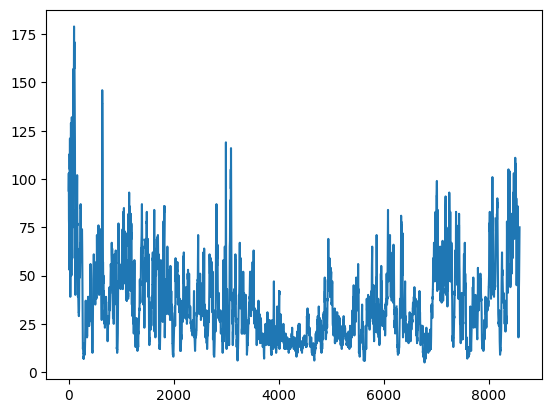

In [132]:
plt.plot(gz17)

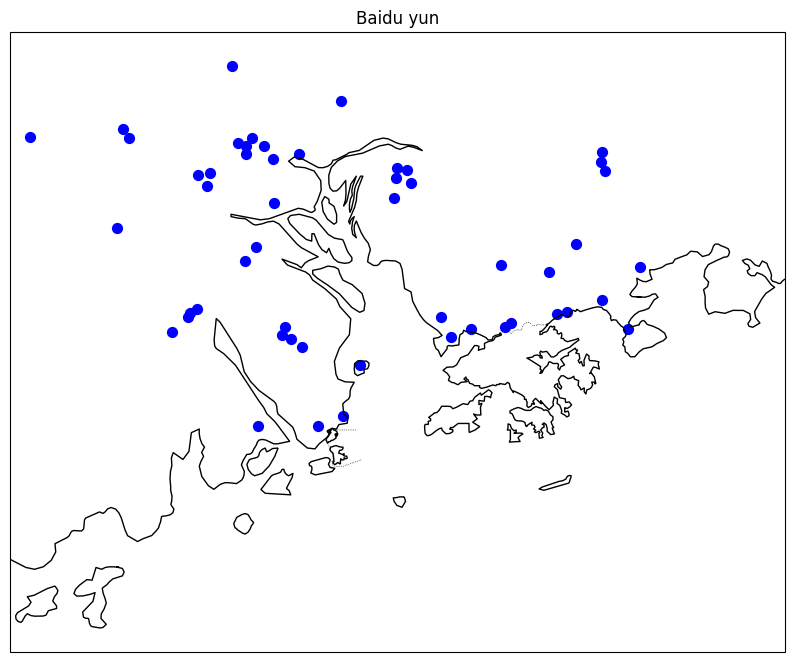

In [133]:
# Create a GeoAxes instance
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map to the Greater Bay Area coordinates
extent = [112.5, 115.0, 21.5, 23.5]  # [min_lon, max_lon, min_lat, max_lat]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':', linewidth=0.5)


# Plot the location as a dot
#ax.scatter(113.235,23.1422, color='red', marker='o', s=80, transform=ccrs.PlateCarree())
for i in range(len(lon)):
    ax.scatter(lon[i],lat[i], color='blue', marker='o', s=50, transform=ccrs.PlateCarree())

# from Baidu yun net
#


# Add a title
ax.set_title('Baidu yun')

# Show the plot
plt.show()

In [141]:
Lat = [23.19, 22.55, 22.285, 22.98, 22.5, 22.6,   23.00,  23.96, 23.02]
Lon = [113.35,114.1, 113.5, 113.065,113.4,113.07, 113.75, 114.41,112.89]
#      广州，  深圳，  珠海，  佛山，   中山， 江门，   东莞，   惠州，  肇庆

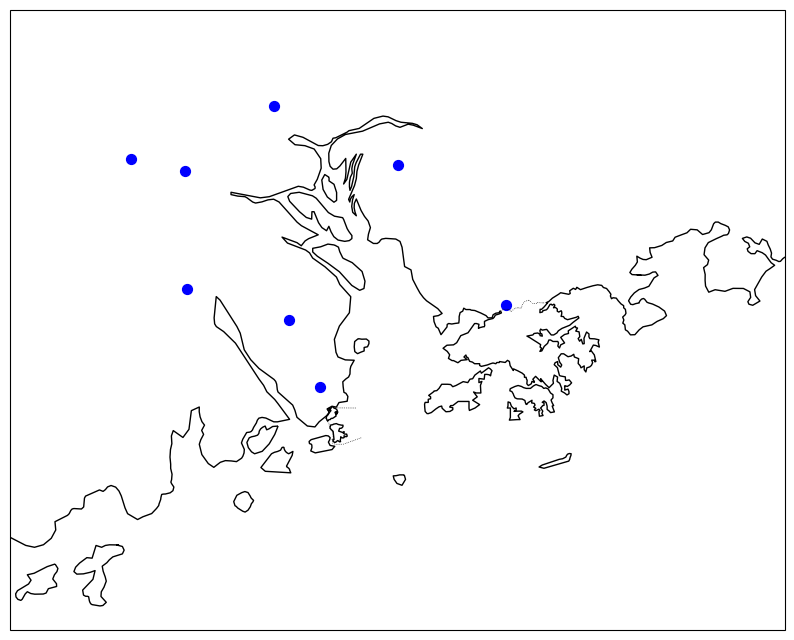

In [142]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map to the Greater Bay Area coordinates
extent = [112.5, 115.0, 21.5, 23.5]  # [min_lon, max_lon, min_lat, max_lat]
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':', linewidth=0.5)


# Plot the location as a dot
#ax.scatter(113.235,23.1422, color='red', marker='o', s=80, transform=ccrs.PlateCarree())
for i in range(len(Lon)):
    ax.scatter(Lon[i],Lat[i], color='blue', marker='o', s=50, transform=ccrs.PlateCarree())

In [143]:
df = {'lon':lon,'lat':lat,'gz17':gz17}

In [144]:
for i in range(len(gz17)):
    val

NameError: name 'val' is not defined

In [155]:
val = pd.DataFrame({
    'gz': gz17,
    'sz': sz17,
    'zh': zh17,
    'fs': fs17,
    'zs': zs17,
    'jm': jm17,
    'dg': dg17,
    'hz': hz17,
    'zq': zq17
})

In [156]:
val

,gz,sz,zh,fs,zs,jm,dg,hz,zq
0,94.0,45.0,69.0,118.0,99.0,98.0,91.0,58.0,65.0
1,97.0,45.0,84.0,122.0,96.0,108.0,109.0,52.0,61.0
2,96.0,43.0,82.0,128.0,91.0,118.0,113.0,48.0,65.0
3,103.0,44.0,79.0,129.0,90.0,118.0,99.0,49.0,69.0
4,87.0,43.0,71.0,127.0,90.0,127.0,98.0,55.0,67.0
...,...,...,...,...,...,...,...,...,...
8586,62.0,58.0,74.0,52.0,58.0,70.0,65.0,67.0,39.0
8587,68.0,61.0,76.0,56.0,61.0,70.0,69.0,73.0,45.0
8588,71.0,65.0,78.0,60.0,68.0,70.0,75.0,75.0,49.0
8589,73.0,67.0,81.0,64.0,68.0,70.0,79.0,77.0,48.0


In [174]:
val['date'] = date
val['hour'] = hour

In [175]:
val

,gz,sz,zh,fs,zs,jm,dg,hz,zq,date,hour
0,94.0,45.0,69.0,118.0,99.0,98.0,91.0,58.0,65.0,20170101,0
1,97.0,45.0,84.0,122.0,96.0,108.0,109.0,52.0,61.0,20170101,1
2,96.0,43.0,82.0,128.0,91.0,118.0,113.0,48.0,65.0,20170101,2
3,103.0,44.0,79.0,129.0,90.0,118.0,99.0,49.0,69.0,20170101,3
4,87.0,43.0,71.0,127.0,90.0,127.0,98.0,55.0,67.0,20170101,4
...,...,...,...,...,...,...,...,...,...,...,...
8586,62.0,58.0,74.0,52.0,58.0,70.0,65.0,67.0,39.0,20171231,19
8587,68.0,61.0,76.0,56.0,61.0,70.0,69.0,73.0,45.0,20171231,20
8588,71.0,65.0,78.0,60.0,68.0,70.0,75.0,75.0,49.0,20171231,21
8589,73.0,67.0,81.0,64.0,68.0,70.0,79.0,77.0,48.0,20171231,22


#### Next

plot the sites on a map, assign the corresponding values to the dots on the map, coordinate Lon, Lat (one for each city)

**advanced**: make the map animate! create an animation of how the values change with time

Text(0.5, 1.0, '20170101_00')

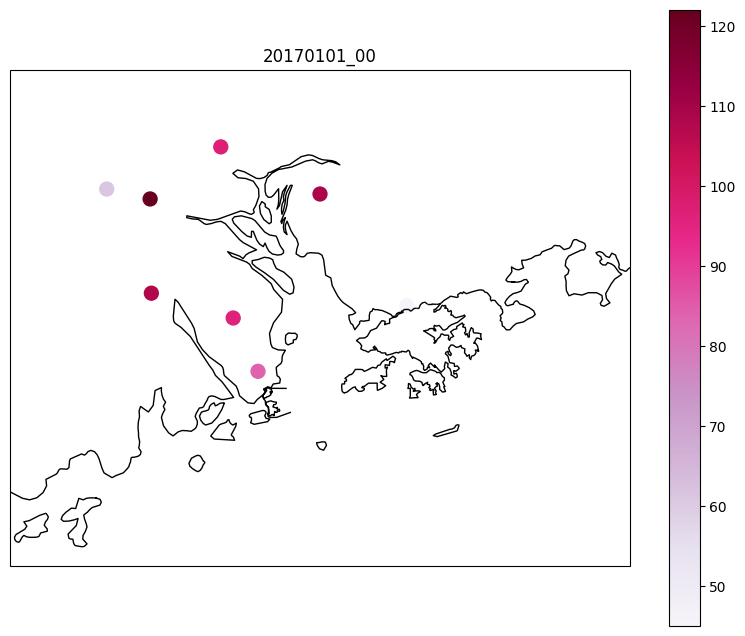

In [176]:
# Set the figure size
plt.figure(figsize=(10, 8))

# # Create a colormap plot using lat, lon, and Jan columns
# sns.scatterplot(data=merged_df, x='lon', y='lat', hue='Jan', palette='viridis', s=100)

# Create a cartopy map with a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
extent = [112.5, 115.0, 21.5, 23.5] 
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Create a scatter plot using lat, lon, and Jan columns
sc = plt.scatter(merged_df['lon'], merged_df['lat'], c=merged_df['Jan'], cmap='PuRd', s=100, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(sc)

plt.title('20170101_00')

In [270]:
merged_df = pd.DataFrame({'lat': Lat, 
                          'lon': Lon, 
                          'midnight': list0101_00,
                          'morning':list0101_06,
                          'noon': list0101_12,
                         'evening':list0101_18})

In [240]:
list0101_00 = val.iloc[1,:-2].tolist()
list0101_12 = val.iloc[12,:-2].tolist()
list0101_06 = val.iloc[6,:-2].tolist()
list0101_18 = val.iloc[15,:-2].tolist()

In [189]:
list0701

[97.0, 45.0, 84.0, 122.0, 96.0, 108.0, 109.0, 52.0, 61.0]

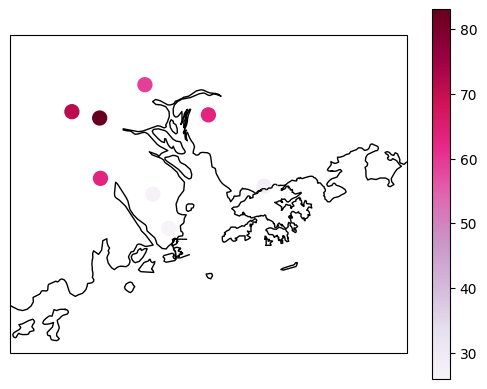

In [195]:
# ax = plt.axes(projection=ccrs.PlateCarree())
# extent = [112.5, 115.0, 21.5, 23.5] 
# ax.set_extent(extent, crs=ccrs.PlateCarree())

# # Add coastlines and borders
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)

# sc = plt.scatter(merged_df['lon'], merged_df['lat'], c=merged_df['noon'], cmap='PuRd', s=100, transform=ccrs.PlateCarree())
# cbar = plt.colorbar(sc)

/var/folders/2n/_rb3symj5cj8_z4p1hf_hkjm0000gn/T/ipykernel_60755/1441616499.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


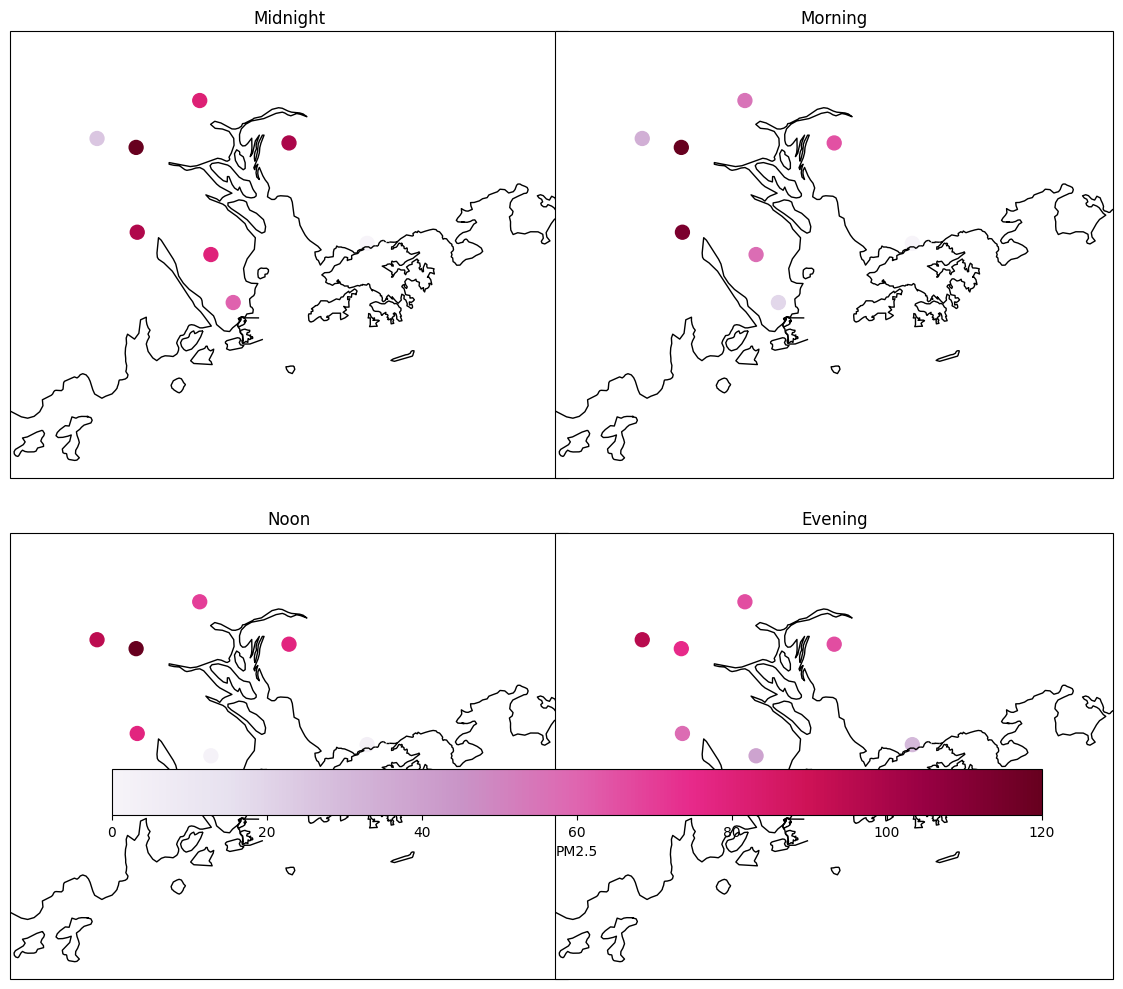

In [271]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the common extent
extent = [112.5, 115.0, 21.5, 23.5]

# Create a 2x2 grid of subplots for the maps
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each column and plot in the respective subplot
for idx, column in enumerate(['midnight', 'morning', 'noon', 'evening']):
    # Calculate the position in the 2x2 grid
    row = idx // 2
    col = idx % 2

    # Set up the subplot with the specified extent
    ax = axs[row, col]
    ax.set_extent(extent)

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Plot the data for the current column
    sc = ax.scatter(merged_df['lon'], merged_df['lat'], c=merged_df[column], cmap='PuRd', s=100, transform=ccrs.PlateCarree())
    ax.set_title(column.capitalize())

# Add a shared colorbar for all subplots
fig.colorbar(sc, ax=axs, orientation='horizontal', label='PM2.5',pad=0.1)
sc.set_clim(0, 120)

plt.tight_layout()
plt.show()

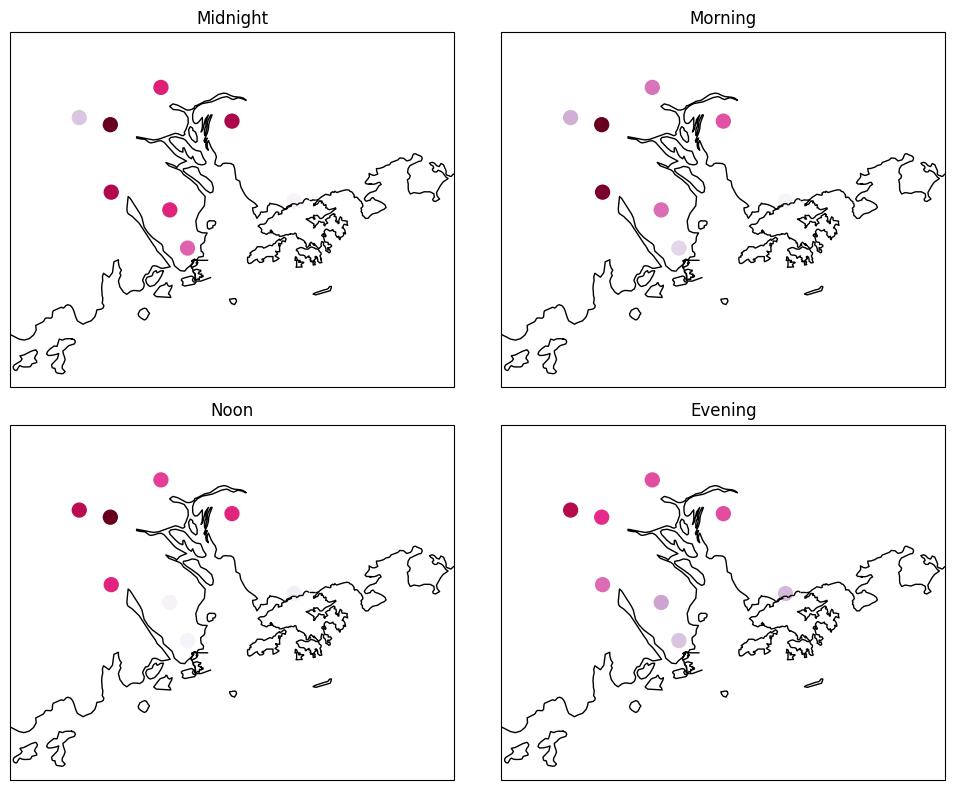

<Figure size 640x480 with 0 Axes>

In [272]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the common extent
extent = [112.5, 115.0, 21.5, 23.5]

# Create a 2x2 grid of subplots for the maps
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})


# Iterate over each column and plot in the respective subplot
for idx, column in enumerate(['midnight', 'morning', 'noon', 'evening']):
    # Calculate the position in the 2x2 grid
    row = idx // 2
    col = idx % 2

    # Set up the subplot with the specified extent
    ax = axs[row, col]
    ax.set_extent(extent)

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Plot the data for the current column
    sc = ax.scatter(merged_df['lon'], merged_df['lat'], c=merged_df[column], cmap='PuRd', s=100, transform=ccrs.PlateCarree())
    ax.set_title(column.capitalize())

sc.set_clim(0, 120)

plt.tight_layout()
#plt.title('20170701')
plt.show()
plt.savefig('20170101.png')

In [250]:
merged_july = pd.DataFrame({'lat': Lat, 
                          'lon': Lon, 
                          'midnight': list0701_00,
                          'morning':list0701_06,
                          'noon': list0701_12,
                         'evening':list0701_18})

In [246]:
list0701_00 = val.iloc[4307,:-2].tolist()
list0701_12 = val.iloc[4319,:-2].tolist()
list0701_06 = val.iloc[4313,:-2].tolist()
list0701_18 = val.iloc[4325,:-2].tolist()

In [245]:
val.iloc[4305:4320,:]

,gz,sz,zh,fs,zs,jm,dg,hz,zq,date,hour
4305,17.0,9.0,8.0,15.0,8.0,11.0,16.0,11.0,13.0,20170701,22
4306,16.0,9.0,9.0,15.0,8.0,12.0,18.0,10.0,15.0,20170701,23
4307,16.0,9.0,8.0,14.0,8.0,13.0,16.0,9.0,14.0,20170702,0
4308,16.0,8.0,8.0,13.0,8.0,14.0,14.0,9.0,16.0,20170702,1
4309,15.0,7.0,8.0,11.0,8.0,12.0,15.0,8.0,19.0,20170702,2
4310,13.0,8.0,8.0,10.0,7.0,10.0,12.0,9.0,19.0,20170702,3
4311,13.0,8.0,9.0,10.0,7.0,11.0,13.0,10.0,15.0,20170702,4
4312,12.0,7.0,9.0,13.0,7.0,11.0,14.0,9.0,16.0,20170702,5
4313,11.0,7.0,8.0,10.0,7.0,11.0,13.0,10.0,15.0,20170702,6
4314,11.0,7.0,8.0,12.0,8.0,11.0,13.0,9.0,12.0,20170702,7


In [234]:
list0701_18

[109.0, 35.0, 31.0, 112.0, 62.0, 81.0, 98.0, 48.0, 94.0, 20170101.0, 22.0]

/var/folders/2n/_rb3symj5cj8_z4p1hf_hkjm0000gn/T/ipykernel_60755/3821344005.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


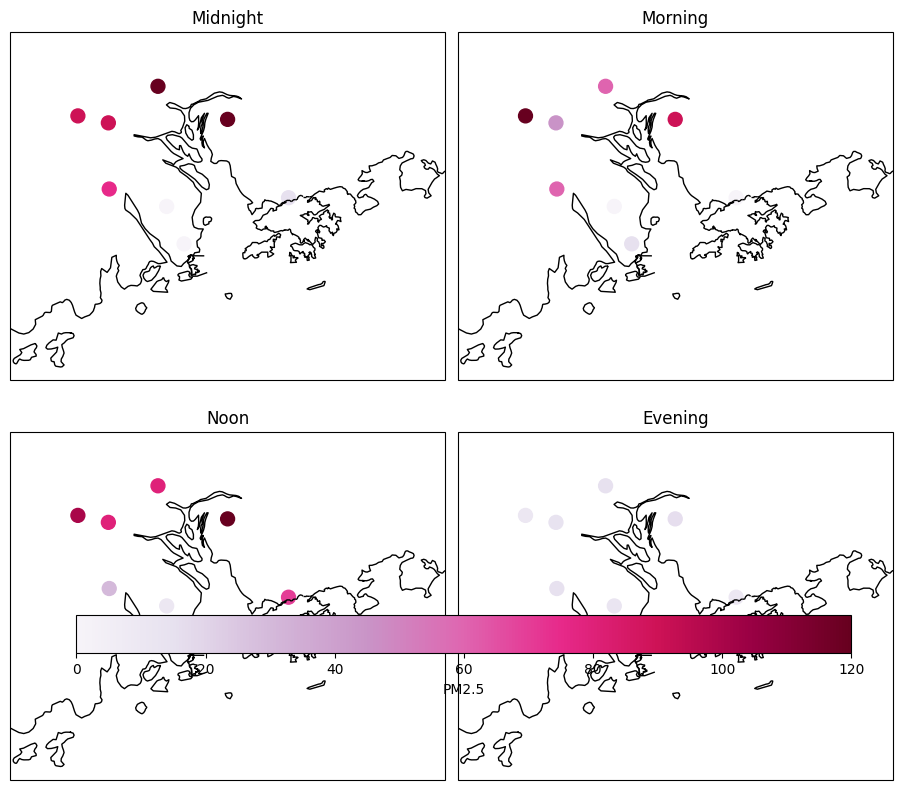

In [269]:
# Create a 2x2 grid of subplots for the maps
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each column and plot in the respective subplot
for idx, column in enumerate(['midnight', 'morning', 'noon', 'evening']):
    # Calculate the position in the 2x2 grid
    row = idx // 2
    col = idx % 2

    # Set up the subplot with the specified extent
    ax = axs[row, col]
    ax.set_extent(extent)

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Plot the data for the current column
    sc = ax.scatter(merged_july['lon'], merged_july['lat'], c=merged_july[column], cmap='PuRd', s=100, transform=ccrs.PlateCarree())
    ax.set_title(column.capitalize())

cbar = fig.colorbar(sc, ax=axs, orientation='horizontal', label='PM2.5', pad=0.1)
sc.set_clim(0, 120)

plt.tight_layout()
plt.show()

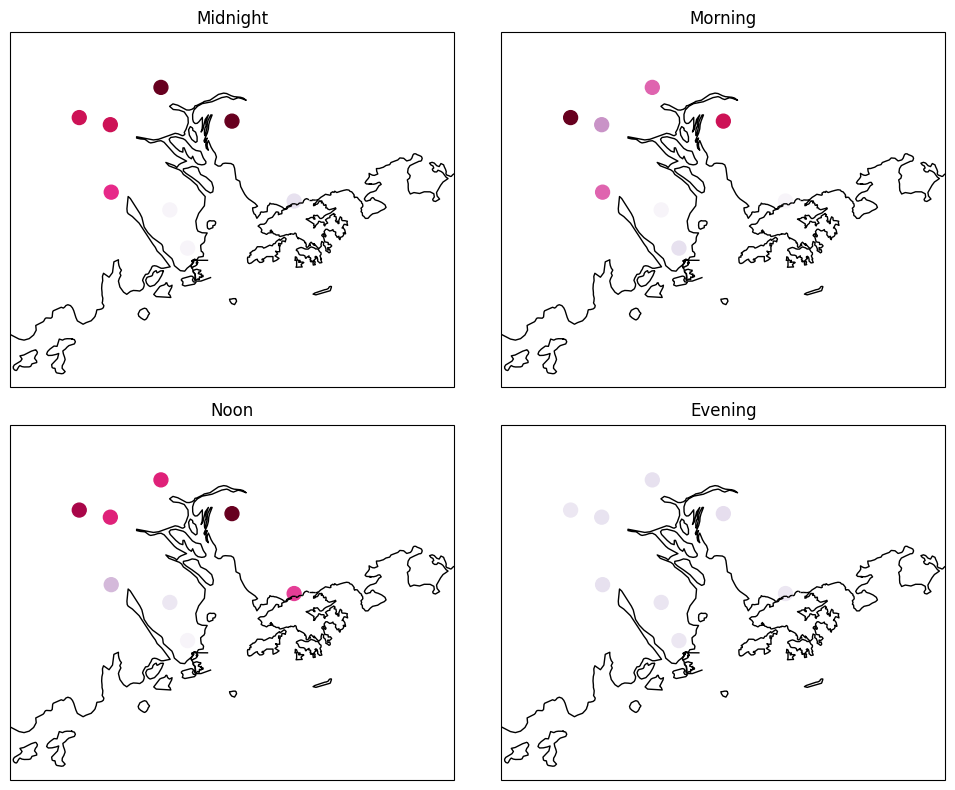

In [268]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the common extent
extent = [112.5, 115.0, 21.5, 23.5]

# Create a 2x2 grid of subplots for the maps
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each column and plot in the respective subplot
for idx, column in enumerate(['midnight', 'morning', 'noon', 'evening']):
    # Calculate the position in the 2x2 grid
    row = idx // 2
    col = idx % 2

    # Set up the subplot with the specified extent
    ax = axs[row, col]
    ax.set_extent(extent)

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Plot the data for the current column
    sc = ax.scatter(merged_july['lon'], merged_july['lat'], c=merged_july[column], cmap='PuRd', s=100, transform=ccrs.PlateCarree())
    ax.set_title(column.capitalize())

# Set the colorbar limits
sc.set_clim(0, 120)

plt.tight_layout()

# Hide the colorbar
plt.show()